펭귄 몸무게 예측 경진대회 : 펭귄의 종류, 날개 길이, 부리 깊이 등 펭귄들의 정보를 담은 데이터를 통해 각 펭귄의 몸무게를 예측하는 대회이다.

In [ ]:
import pandas as pd

import warnings
warnings.filterwarnings('ignore')

pd.set_option('display.max_columns', None) # 모든 컬럼 다 보기

train = pd.read_csv("train.csv")
train.head()

# train 데이터의 head를 보고 어떤 데이터를 가지고 있는지 확인

,id,Species,Island,Clutch Completion,Culmen Length (mm),Culmen Depth (mm),Flipper Length (mm),Sex,Delta 15 N (o/oo),Delta 13 C (o/oo),Body Mass (g)
0,0,Gentoo penguin (Pygoscelis papua),Biscoe,Yes,50.0,15.3,220,MALE,8.30515,-25.19017,5550
1,1,Chinstrap penguin (Pygoscelis antarctica),Dream,No,49.5,19.0,200,MALE,9.63074,-24.34684,3800
2,2,Gentoo penguin (Pygoscelis papua),Biscoe,Yes,45.1,14.4,210,FEMALE,8.51951,-27.01854,4400
3,3,Gentoo penguin (Pygoscelis papua),Biscoe,Yes,44.5,14.7,214,FEMALE,8.20106,-26.16524,4850
4,4,Gentoo penguin (Pygoscelis papua),Biscoe,No,49.6,16.0,225,MALE,8.38324,-26.84272,5700


<데이터 설명>  
species : 종   
island : 서식지  
clutch completion : 관찰된 펭귄 둥지의 알이 2개인 경우 Full Clutch이며 Yes로 표기  
Culmen Length (mm) : 펭귄 옆모습 기준 부리의 가로 길이  
Culmen Depth (mm) : 펭귄 옆모습 기준 부리의 세로 길이  
Flipper Length (mm) : 펭귄의 팔(날개) 길이  
Sex : 펭귄의 성별  
Delta 15 N (o/oo)  : 토양에 따라 변화하는 안정 동위원소 15N:14N의 비율  
Delta 13 C (o/oo) : 먹이에 따라 변화하는 안정 동위원소 13C:12C의 비율  

<데이터 전처리 과정>

In [ ]:
train.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 114 entries, 0 to 113
Data columns (total 11 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   id                   114 non-null    int64  
 1   Species              114 non-null    object 
 2   Island               114 non-null    object 
 3   Clutch Completion    114 non-null    object 
 4   Culmen Length (mm)   114 non-null    float64
 5   Culmen Depth (mm)    114 non-null    float64
 6   Flipper Length (mm)  114 non-null    int64  
 7   Sex                  111 non-null    object 
 8   Delta 15 N (o/oo)    111 non-null    float64
 9   Delta 13 C (o/oo)    111 non-null    float64
 10  Body Mass (g)        114 non-null    int64  
dtypes: float64(4), int64(3), object(4)
memory usage: 9.9+ KB


114개의 데이터가 있는데, 111개의 데이터를 가진 특성들도 있다. 결측치를 갖고 있다는 것을 알 수 있다.

In [ ]:
# 결측치를 알아보기 위해 isnull 함수를 사용하였다.
train.isnull().sum()

id                     0
Species                0
Island                 0
Clutch Completion      0
Culmen Length (mm)     0
Culmen Depth (mm)      0
Flipper Length (mm)    0
Sex                    3
Delta 15 N (o/oo)      3
Delta 13 C (o/oo)      3
Body Mass (g)          0
dtype: int64

sex, Delta 15 N (o/oo), Delta 13 C (o/oo) 데이터에 3개의 결측치가 존재한다.

In [ ]:
# 결측치가 있는 행 확인
train[train.isna().sum(axis=1) > 0]

,id,Species,Island,Clutch Completion,Culmen Length (mm),Culmen Depth (mm),Flipper Length (mm),Sex,Delta 15 N (o/oo),Delta 13 C (o/oo),Body Mass (g)
6,6,Adelie Penguin (Pygoscelis adeliae),Torgersen,Yes,42.0,20.2,190,NaN,9.13362,-25.09368,4250
8,8,Adelie Penguin (Pygoscelis adeliae),Torgersen,Yes,34.1,18.1,193,NaN,NaN,NaN,3475
18,18,Adelie Penguin (Pygoscelis adeliae),Dream,No,39.8,19.1,184,MALE,NaN,NaN,4650
70,70,Gentoo penguin (Pygoscelis papua),Biscoe,Yes,46.2,14.4,214,NaN,8.24253,-26.81540,4650
109,109,Adelie Penguin (Pygoscelis adeliae),Torgersen,Yes,36.6,17.8,185,FEMALE,NaN,NaN,3700


In [ ]:
# 결측치가 포함된 행 모두 제거
train_preprocessed = train.dropna()

인코딩
성별 변수는 라벨 인코딩, 나머지 범주형 변수는 더미화  
더미화 : 범주 데이터의 경우 데이터의 종류의 개수로 특성을 만들고 0/1로 각 샘플의 카테고리를 기록해주는 것이다.

In [ ]:
train_preprocessed.loc[train_preprocessed['Sex'] == 'MALE', 'Sex'] = 0
train_preprocessed.loc[train_preprocessed['Sex'] == 'FEMALE', 'Sex'] = 1
train_preprocessed = train_preprocessed.astype({'Sex': 'int'})

labeled_train = pd.get_dummies(train_preprocessed)

labeled_train.head()

,id,Culmen Length (mm),Culmen Depth (mm),Flipper Length (mm),Sex,Delta 15 N (o/oo),Delta 13 C (o/oo),Body Mass (g),Species_Adelie Penguin (Pygoscelis adeliae),Species_Chinstrap penguin (Pygoscelis antarctica),Species_Gentoo penguin (Pygoscelis papua),Island_Biscoe,Island_Dream,Island_Torgersen,Clutch Completion_No,Clutch Completion_Yes
0,0,50.0,15.3,220,0,8.30515,-25.19017,5550,0,0,1,1,0,0,0,1
1,1,49.5,19.0,200,0,9.63074,-24.34684,3800,0,1,0,0,1,0,1,0
2,2,45.1,14.4,210,1,8.51951,-27.01854,4400,0,0,1,1,0,0,0,1
3,3,44.5,14.7,214,1,8.20106,-26.16524,4850,0,0,1,1,0,0,0,1
4,4,49.6,16.0,225,0,8.38324,-26.84272,5700,0,0,1,1,0,0,1,0


In [ ]:
test = pd.read_csv("test.csv")
test.head()

,id,Species,Island,Clutch Completion,Culmen Length (mm),Culmen Depth (mm),Flipper Length (mm),Sex,Delta 15 N (o/oo),Delta 13 C (o/oo)
0,0,Chinstrap penguin (Pygoscelis antarctica),Dream,Yes,52.0,20.7,210.0,MALE,9.43146,-24.68440
1,1,Gentoo penguin (Pygoscelis papua),Biscoe,Yes,55.9,17.0,228.0,MALE,8.31180,-26.35425
2,2,Adelie Penguin (Pygoscelis adeliae),Dream,Yes,38.9,18.8,190.0,FEMALE,8.36936,-26.11199
3,3,Chinstrap penguin (Pygoscelis antarctica),Dream,Yes,45.2,16.6,191.0,FEMALE,9.62357,-24.78984
4,4,Adelie Penguin (Pygoscelis adeliae),Biscoe,No,37.9,18.6,172.0,FEMALE,8.38404,-25.19837


test의 결측치 : sex 6개, delta 15N 9개, delta 13N 8개

성별은 예측하여서(decision tree) 결측치를 채우고 나머지는 평균(mean)으로 채웠다.

In [ ]:
# 성별 결측치 예측 (성별을 예측하는 과정에만 유효하며, 전체 데이터 분석에 영향을 주지 않음)

## 성별을 라벨로 설정한 후 분석
x_train = test[test['Sex'].notnull()].drop(['Sex'], axis = 1)
y_train = test[test['Sex'].notnull()]['Sex']
x_test = test[test['Sex'].isnull()].drop(['Sex'], axis = 1)

x_test_id = x_test.loc[:, 'id']

x_train = x_train.iloc[:, 1:]
x_test = x_test.iloc[:, 1:]

## Delta값의 결측치에는 train 데이터의 평균 입력
# loc은 행 열 검색
x_train.loc[:, 'Delta 15 N (o/oo)'] = x_train['Delta 15 N (o/oo)'].fillna(train['Delta 15 N (o/oo)'].mean())
x_train.loc[:, 'Delta 13 C (o/oo)'] = x_train['Delta 13 C (o/oo)'].fillna(train['Delta 13 C (o/oo)'].mean())
x_test.loc[:, 'Delta 15 N (o/oo)'] = x_test['Delta 15 N (o/oo)'].fillna(train['Delta 15 N (o/oo)'].mean())
x_test.loc[:, 'Delta 13 C (o/oo)'] = x_test['Delta 13 C (o/oo)'].fillna(train['Delta 13 C (o/oo)'].mean())

## 범주형 변수 라벨 인코딩
from sklearn.preprocessing import LabelEncoder
x_train.loc[:,['Species','Island','Clutch Completion']] = x_train.loc[:,['Species','Island','Clutch Completion']].apply(LabelEncoder().fit_transform)
x_test.loc[:,['Species','Island','Clutch Completion']] = x_test.loc[:,['Species','Island','Clutch Completion']].apply(LabelEncoder().fit_transform)

# 성별 예측 decisiontree
from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier(random_state=1, max_depth=10) # 총 10층으로 구성
model.fit(x_train, y_train)
print('DTree score: ', model.score(x_train,y_train))

DTree score:  1.0


[Text(0.541958041958042, 0.9545454545454546, 'X[4] <= 18.05\ngini = 0.5\nsamples = 222\nvalue = [110, 112]'),
 Text(0.35664335664335667, 0.8636363636363636, 'X[5] <= 214.5\ngini = 0.432\nsamples = 133\nvalue = [91, 42]'),
 Text(0.2097902097902098, 0.7727272727272727, 'X[3] <= 47.8\ngini = 0.165\nsamples = 88\nvalue = [80, 8]'),
 Text(0.11188811188811189, 0.6818181818181818, 'X[4] <= 17.95\ngini = 0.097\nsamples = 78\nvalue = [74, 4]'),
 Text(0.055944055944055944, 0.5909090909090909, 'X[6] <= 9.212\ngini = 0.053\nsamples = 73\nvalue = [71, 2]'),
 Text(0.027972027972027972, 0.5, 'gini = 0.0\nsamples = 58\nvalue = [58, 0]'),
 Text(0.08391608391608392, 0.5, 'X[7] <= -25.286\ngini = 0.231\nsamples = 15\nvalue = [13, 2]'),
 Text(0.055944055944055944, 0.4090909090909091, 'X[1] <= 1.5\ngini = 0.444\nsamples = 3\nvalue = [1, 2]'),
 Text(0.027972027972027972, 0.3181818181818182, 'gini = 0.0\nsamples = 2\nvalue = [0, 2]'),
 Text(0.08391608391608392, 0.3181818181818182, 'gini = 0.0\nsamples = 1\nv

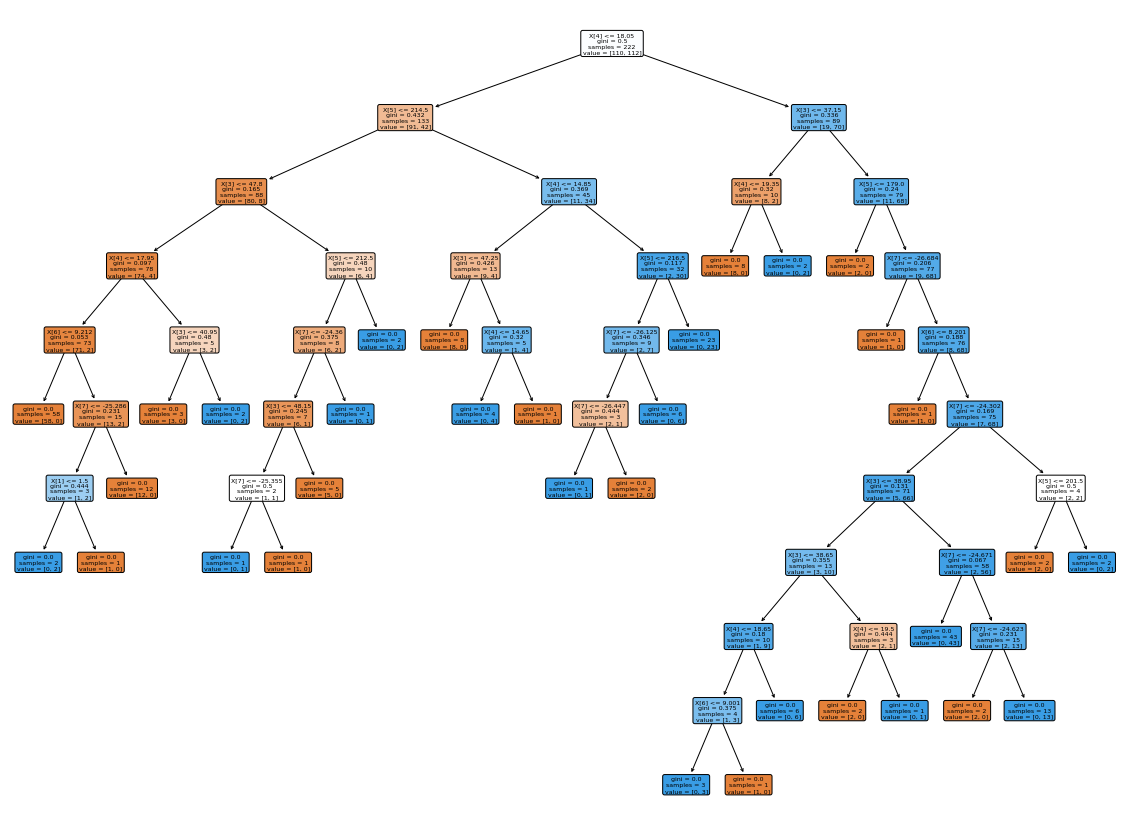

In [ ]:
# 성별 예측 tree 시각화하기
import matplotlib.pyplot as plt
from sklearn import tree

plt.figure( figsize=(20,15) )
tree.plot_tree(model,
               impurity=True, filled=True,
               rounded=True)

In [ ]:
# 예측한 성별 값으로 결측치 대체
import numpy as np

test['Sex'].iloc[np.where(test['Sex'].isnull()==True)] =  model.predict(x_test)

In [ ]:
# 수치형 변수의 결측치는 평균으로 대체
test.loc[:, 'Delta 15 N (o/oo)'] = test['Delta 15 N (o/oo)'].fillna(train['Delta 15 N (o/oo)'].mean())
test.loc[:, 'Delta 13 C (o/oo)'] = test['Delta 13 C (o/oo)'].fillna(train['Delta 13 C (o/oo)'].mean())

In [ ]:
missing_col = check_missing_col(test)

결측치가 존재하지 않습니다


In [ ]:
test.head()

,id,Species,Island,Clutch Completion,Culmen Length (mm),Culmen Depth (mm),Flipper Length (mm),Sex,Delta 15 N (o/oo),Delta 13 C (o/oo)
0,0,Chinstrap penguin (Pygoscelis antarctica),Dream,Yes,52.0,20.7,210.0,MALE,9.43146,-24.68440
1,1,Gentoo penguin (Pygoscelis papua),Biscoe,Yes,55.9,17.0,228.0,MALE,8.31180,-26.35425
2,2,Adelie Penguin (Pygoscelis adeliae),Dream,Yes,38.9,18.8,190.0,FEMALE,8.36936,-26.11199
3,3,Chinstrap penguin (Pygoscelis antarctica),Dream,Yes,45.2,16.6,191.0,FEMALE,9.62357,-24.78984
4,4,Adelie Penguin (Pygoscelis adeliae),Biscoe,No,37.9,18.6,172.0,FEMALE,8.38404,-25.19837


In [ ]:
# Test Data 인코딩
test.loc[test['Sex'] == 'MALE', 'Sex'] = 0
test.loc[test['Sex'] == 'FEMALE', 'Sex'] = 1
test = test.astype({'Sex': 'int'})

labeled_test = pd.get_dummies(test)

In [ ]:
labeled_test = labeled_test.drop(['id'], axis=1) # id 컬럼을 제거하여 train셋과 형태 통일
labeled_test.head()

,Culmen Length (mm),Culmen Depth (mm),Flipper Length (mm),Sex,Delta 15 N (o/oo),Delta 13 C (o/oo),Species_Adelie Penguin (Pygoscelis adeliae),Species_Chinstrap penguin (Pygoscelis antarctica),Species_Gentoo penguin (Pygoscelis papua),Island_Biscoe,Island_Dream,Island_Torgersen,Clutch Completion_No,Clutch Completion_Yes
0,52.0,20.7,210.0,0,9.43146,-24.68440,0,1,0,0,1,0,0,1
1,55.9,17.0,228.0,0,8.31180,-26.35425,0,0,1,1,0,0,0,1
2,38.9,18.8,190.0,1,8.36936,-26.11199,1,0,0,0,1,0,0,1
3,45.2,16.6,191.0,1,9.62357,-24.78984,0,1,0,0,1,0,0,1
4,37.9,18.6,172.0,1,8.38404,-25.19837,1,0,0,1,0,0,1,0


In [ ]:
labeled_test.shape

(228, 14)

모델 학습

In [ ]:
X = labeled_train.drop(['id', 'Body Mass (g)'], axis = 1) # train의 id를 없애고 y값(body mass)을 없앰.
Y = labeled_train['Body Mass (g)'] # y값만

In [ ]:
num_folds = 10
seed = 7
scoring = 'neg_root_mean_squared_error' 

In [ ]:
# train , valid set 쪼개줌
from sklearn.model_selection import train_test_split

X_train, X_valid, y_train, y_valid = train_test_split(X, Y,test_size=0.2,random_state=seed)

In [ ]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import ElasticNet
from sklearn.svm import SVR
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import ExtraTreesRegressor

base model

In [ ]:
models = []
models.append(('LR',LinearRegression()))
models.append(('LASSO',Lasso()))
models.append(('KNN',KNeighborsRegressor()))
models.append(('CART',DecisionTreeRegressor()))
models.append(('EN',ElasticNet()))
models.append(('SVM',SVR()))
models.append(('RFR',RandomForestRegressor()))
models.append(('XGBR',XGBRegressor()))
models.append(('LGBMR',LGBMRegressor()))
models.append(('AdaR',AdaBoostRegressor()))
models.append(('Xtree',ExtraTreesRegressor()))

results =[]
names = []
for name, model in models:
  kfold = KFold(n_splits=10,random_state=7,shuffle = True)
  cv_results = cross_val_score(model,X_train,y_train
                               ,cv= kfold,scoring=scoring)
  results.append(cv_results)
  names.append(name)
  msg = "%s : %f (%f) "%(name,cv_results.mean(),cv_results.std())
  print(msg)

LR : -303.751745 (69.919498) 
LASSO : -302.723049 (72.406027) 
KNN : -375.723677 (110.156216) 
CART : -440.704738 (128.610338) 
EN : -353.722001 (113.510510) 
SVM : -777.029748 (173.598864) 
RFR : -310.138590 (123.979218) 
[15:42:01] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[15:42:01] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[15:42:01] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[15:42:01] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[15:42:01] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[15:42:01] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[15:42:01] WARN

standardization - 평균 0 분산 1로 표준화하고 모델링한경우

In [ ]:
from sklearn.pipeline import Pipeline
from sklearn import preprocessing

# 파이프라인에 데이터 전처리 코드 - standardization을 넣어주었다.
pipelines = []
pipelines.append(('ScaledLR',Pipeline([('Scaler',preprocessing.StandardScaler()),('LR',LinearRegression())])))
pipelines.append(('ScaledLASSO',Pipeline([('Scaler',preprocessing.StandardScaler()),('LASSO',Lasso())])))
pipelines.append(('ScaledKNN',Pipeline([('Scaler',preprocessing.StandardScaler()),('KNN',KNeighborsRegressor())])))
pipelines.append(('ScaledCART',Pipeline([('Scaler',preprocessing.StandardScaler()),('CART',DecisionTreeRegressor())])))
pipelines.append(('ScaledEN',Pipeline([('Scaler',preprocessing.StandardScaler()),('EN',ElasticNet())])))
pipelines.append(('ScaledSVM',Pipeline([('Scaler',preprocessing.StandardScaler()),('SVM',SVR())])))
pipelines.append(('ScaledRFR',Pipeline([('Scaler',preprocessing.StandardScaler()),('RFR',RandomForestRegressor())])))
pipelines.append(('ScaledXGBR',Pipeline([('Scaler',preprocessing.StandardScaler()),('XGBR',XGBRegressor())])))
pipelines.append(('ScaledLGBMR',Pipeline([('Scaler',preprocessing.StandardScaler()),('LGBMR',LGBMRegressor())])))
pipelines.append(('ScaledAdaR',Pipeline([('Scaler',preprocessing.StandardScaler()),('AdaR',AdaBoostRegressor())])))
pipelines.append(('ScaledXtree',Pipeline([('Scaler',preprocessing.StandardScaler()),('Xtree',ExtraTreesRegressor())])))

results_scaled =[]
names_scaled = []
for name, model in pipelines:
  kfold = KFold(n_splits=10,random_state=7,shuffle = True)
  cv_results = cross_val_score(model,X_train,y_train
                               ,cv= kfold,scoring=scoring)
  results_scaled.append(cv_results)
  names_scaled.append(name)
  msg = "%s : %f (%f) "%(name,cv_results.mean(),cv_results.std())
  print(msg)

ScaledLR : -303.751745 (69.919498) 
ScaledLASSO : -303.573790 (71.376510) 
ScaledKNN : -351.366577 (115.408696) 
ScaledCART : -434.770068 (134.790817) 
ScaledEN : -314.317417 (129.180425) 
ScaledSVM : -768.104262 (172.547218) 
ScaledRFR : -309.293858 (126.092376) 
[15:44:11] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[15:44:11] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[15:44:11] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[15:44:11] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[15:44:11] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[15:44:11] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in 

normalization - 값의 범위(scale)를 0~1 사이의 값으로 바꾸는 것

In [ ]:
pipelines = []
pipelines.append(('NormLR',Pipeline([('Scaler',preprocessing.Normalizer()),('LR',LinearRegression())])))
pipelines.append(('NormLASSO',Pipeline([('Scaler',preprocessing.Normalizer()),('LASSO',Lasso())])))
pipelines.append(('NormKNN',Pipeline([('Scaler',preprocessing.Normalizer()),('KNN',KNeighborsRegressor())])))
pipelines.append(('NormCART',Pipeline([('Scaler',preprocessing.Normalizer()),('CART',DecisionTreeRegressor())])))
pipelines.append(('NormEN',Pipeline([('Scaler',preprocessing.Normalizer()),('EN',ElasticNet())])))
pipelines.append(('NormSVM',Pipeline([('Scaler',preprocessing.Normalizer()),('SVM',SVR())])))
pipelines.append(('NormRFR',Pipeline([('Scaler',preprocessing.Normalizer()),('RFR',RandomForestRegressor())])))
pipelines.append(('NormXGBR',Pipeline([('Scaler',preprocessing.Normalizer()),('XGBR',XGBRegressor())])))
pipelines.append(('NormLGBMR',Pipeline([('Scaler',preprocessing.Normalizer()),('LGBMR',LGBMRegressor())])))
pipelines.append(('NormAdaR',Pipeline([('Scaler',preprocessing.Normalizer()),('AdaR',AdaBoostRegressor())])))
pipelines.append(('NormXtree',Pipeline([('Scaler',preprocessing.Normalizer()),('Xtree',ExtraTreesRegressor())])))

results_norm =[]
names_norm = []
for name, model in pipelines:
  kfold = KFold(n_splits=10,random_state=7,shuffle = True)
  cv_results = cross_val_score(model,X_train,y_train
                               ,cv= kfold,scoring=scoring)
  results_norm.append(cv_results)
  names_norm.append(name)
  msg = "%s : %f (%f) "%(name,cv_results.mean(),cv_results.std())
  print(msg)

NormLR : -304.858013 (70.246789) 
NormLASSO : -502.373773 (158.521677) 
NormKNN : -386.055361 (124.486338) 
NormCART : -400.857343 (123.047337) 
NormEN : -773.062771 (160.074694) 
NormSVM : -777.523732 (173.720350) 
NormRFR : -316.615261 (110.976903) 
[16:08:32] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[16:08:32] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[16:08:32] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[16:08:32] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[16:08:32] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[16:08:32] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:

In [ ]:
# gridsearchCV를 통해 어떤 하이퍼파라미터가 효과적일지 확인

from sklearn.model_selection import GridSearchCV

params = { 'n_estimators' : [10, 50,100],
           'max_depth' : [6, 12,18,24],
           'min_samples_leaf' : [1, 6, 12, 18],
           'min_samples_split' : [2, 8, 16, 20]
            }
model = RandomForestRegressor()
kfold = KFold(n_splits= num_folds,random_state = seed,shuffle = True)
grid = GridSearchCV(estimator= model, param_grid = params,scoring= 'neg_root_mean_squared_error',cv=kfold )
rfr_grid_result = grid.fit(X,Y)

In [ ]:
print("Best : %f using %s "%(rfr_grid_result.best_score_,rfr_grid_result.best_params_))

Best : -304.724221 using {'max_depth': 12, 'min_samples_leaf': 1, 'min_samples_split': 8, 'n_estimators': 10} 


In [ ]:
# nomalization한 데이터의 경우

normed = preprocessing.Normalizer().fit(X)
normed_X = normed.transform(X)
params = {"max_depth":[3,4,5],
          "n_estimators":[100,200],
          "learning_rate":[0.05,0.1,0.2]}
model = LGBMRegressor()
kfold = KFold(n_splits= num_folds,random_state = seed,shuffle = True)
grid = GridSearchCV(estimator= model, param_grid = params,scoring= 'neg_root_mean_squared_error',cv=kfold )
normed_lgbm_grid_result = grid.fit(normed_X,Y)

In [ ]:
print("Best : %f using %s "%(normed_lgbm_grid_result.best_score_,normed_lgbm_grid_result.best_params_))

Best : -327.676554 using {'learning_rate': 0.05, 'max_depth': 3, 'n_estimators': 100} 


In [ ]:
normed = preprocessing.Normalizer().fit(X)
normed_X = normed.transform(X)
params = {"n_estimators" : [10, 100, 200, 500],
          "learning_rate" : [0.001, 0.01, 0.1, 0.5, 1, 1.5, 2]
         }
model = AdaBoostRegressor()
kfold = KFold(n_splits= num_folds,random_state = seed,shuffle = True)
grid = GridSearchCV(estimator= model, param_grid = params,scoring= 'neg_root_mean_squared_error',cv=kfold )
normed_AdaR_grid_result = grid.fit(normed_X,Y)

In [ ]:
print("Best : %f using %s "%(normed_AdaR_grid_result.best_score_,normed_AdaR_grid_result.best_params_))

Best : -304.318926 using {'learning_rate': 0.1, 'n_estimators': 100} 


LASSO, Standardization한 LR, Normalization한 AdaR, RFR, Normalization한 LGBMR의 결과가 가장 좋음  
이 모델들을 하이퍼파라미터 튜닝하여 최고의 결과 뽑아내기

앙상블

In [ ]:
from sklearn.metrics import mean_squared_error
import math

In [ ]:
errors = []
pred_valid=[]
pred_test = []

In [ ]:
#표준화
scaler = preprocessing.StandardScaler().fit(X_train)
scaled_X_train = scaler.transform(X_train)
scaled_X_valid = scaler.transform(X_valid)
scaled_X_test = scaler.transform(labeled_test)

In [ ]:
#정규화
normed = preprocessing.Normalizer().fit(X_train)
normed_X_train = normed.transform(X_train)
normed_X_valid = scaler.transform(X_valid)
normed_X_test = scaler.transform(labeled_test)

In [ ]:
lasso = Lasso()
lasso.fit(X_train,y_train)
lasso_valid = lasso.predict(X_valid)
rmse = math.sqrt(mean_squared_error(y_valid, lasso_valid))
errors.append(('Lasso',rmse))
pred_valid.append(('Lasso',lasso_valid))
lasso_test = lasso.predict(labeled_test)
pred_test.append(('Lasso',lasso_test))

In [ ]:
LR =LinearRegression()
LR.fit(scaled_X_train,y_train)
lr_valid = LR.predict(scaled_X_valid)
rmse = math.sqrt(mean_squared_error(y_valid, lr_valid))
errors.append(('LR',rmse))
pred_valid.append(('LR',lr_valid))
lr_test = LR.predict(scaled_X_test)
pred_test.append(('LR',lr_test))

In [ ]:
RF =RandomForestRegressor(max_depth = 12,
                          min_samples_leaf = 1,
                          min_samples_split = 16,
                          n_estimators = 10)
RF.fit(X_train,y_train)
rf_valid = RF.predict(X_valid)
rmse = math.sqrt(mean_squared_error(y_valid, rf_valid))
errors.append(('RF',rmse))
pred_valid.append(('RF',rf_valid))
rf_test = RF.predict(labeled_test)
pred_test.append(('RF',rf_test))

In [ ]:
LGB = LGBMRegressor(learning_rate = 0.05, 
                    max_depth = 3,
                    n_estimators = 100)
LGB.fit(normed_X_train, y_train)
LGB_valid = LGB.predict(normed_X_valid)
rmse = math.sqrt(mean_squared_error(y_valid, LGB_valid))
errors.append(('LGB',rmse))
pred_valid.append(('LGB',LGB_valid))
LGB_test = LGB.predict(normed_X_test)
pred_test.append(('LGB',LGB_test))

In [ ]:
Ada = AdaBoostRegressor(learning_rate = 0.01, 
                        n_estimators = 100)
Ada.fit(normed_X_train, y_train)
Ada_valid = Ada.predict(normed_X_valid)
rmse = math.sqrt(mean_squared_error(y_valid, Ada_valid))
errors.append(('Ada',rmse))
pred_valid.append(('Ada',Ada_valid))
Ada_test = Ada.predict(normed_X_test)
pred_test.append(('Ada',Ada_test))

In [ ]:
for name, error in errors:
  print("{} : {}".format(name,error))

In [ ]:
# 모델 앙상블을 통한 RMSE 구하기
val= np.zeros(X_valid.shape[0])
for name, pred in pred_valid:
  val+= ((1/5) * pred)
math.sqrt(mean_squared_error(y_valid, val))

In [ ]:
# 값이 높은 3가지 모델로 앙상블
val= np.zeros(X_valid.shape[0])
for name, pred in pred_valid:
  if name == 'Lasso' or name=='LR' or name == 'RF':
    val+= ((1/3)* pred)
math.sqrt(mean_squared_error(y_valid, val))

In [ ]:
test_val= np.zeros(labeled_test.shape[0])
for name, pred in pred_test:
  if name == 'Lasso' or name=='LR' or name == 'RF':
    test_val+= ((1/3) * pred)